# Potential Line Charge

Due to non trivial potentials for line charges is is easier to use the direct calculation for the elctric field of the line charges

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst
%matplotlib inline

# Line Charge

In [117]:
# def Epotential(x,y,V,x0,y0):
#     """
#     Electric potential line charge
    
#     Inputs:
#         (float) x  : x coordinate potential
#         (float) y  : y coordinate potential
#         (float) V  : potential wire
#         (float) x0 : x coordinate wire
#         (float) y0 : y coordinate wire
#     """
#     dr = np.sqrt((x-x0)**2+(y-y0)**2)
#     return -V*np.log(dr)

# def Epotential(x,y,V,x0,y0,l):
#     """
#     Electric potential line charge
#     finite wire length
    
#     Inputs:
#         (float) x  : x coordinate potential
#         (float) y  : y coordinate potential
#         (float) V  : potential wire
#         (float) x0 : x coordinate wire
#         (float) y0 : y coordinate wire
#         (float) l  : wire length
#     """
#     dr = np.sqrt((x-x0)**2+(y-y0)**2)
#     sq = np.sqrt((l/2)**2+dr**2)
#     val = (l/2 + sq)/(-l/2 + sq)
#     return V*np.log(val)

# def Epotential(x,y,V,x0,y0,r0):
#     """
#     Electric potential line charge
#     wire radius
    
#     Inputs:
#         (float) x  : x coordinate potential
#         (float) y  : y coordinate potential
#         (float) V  : potential wire
#         (float) x0 : x coordinate wire
#         (float) y0 : y coordinate wire
#         (float) r0
#     """
#     dr = np.sqrt((x-x0)**2+(y-y0)**2)
#     potential = V*np.log(r0/dr)+V
#     m = dr < r0
#     potential[m] = V
#     return potential

# def Efield(x,y,mu,x0,y0):
#     """
#     Electric field line charge
#     mu line charge
    
#     Inputs:
#         (float) x  : x coordinate potential
#         (float) y  : y coordinate potential
#         (float) mu : line charge
#         (float) x0 : x coordinate wire
#         (float) y0 : y coordinate wire
#     """
# #     factor = mu/(2*np.pi*cst.epsilon_0)
#     factor = mu
#     dr = np.sqrt((x-x0)**2+(y-y0)**2)
#     return factor/dr * np.array([(x-x0)/dr, (y-y0)/dr])

In [119]:
y,x = np.mgrid[.5:-.5:501j,.5:-.5:501j]

In [120]:
potential = Epotential(x,y,1,0,0,0.08)
potential[potential == np.inf] = np.nan
potential[np.isnan(potential)] = np.nanmax(potential)
potential[potential == -np.inf] = np.nan
potential[np.isnan(potential)] = np.nanmin(potential)

dx = np.diff(x).min()
dy = np.diff(y, axis = 0).min()
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy

C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


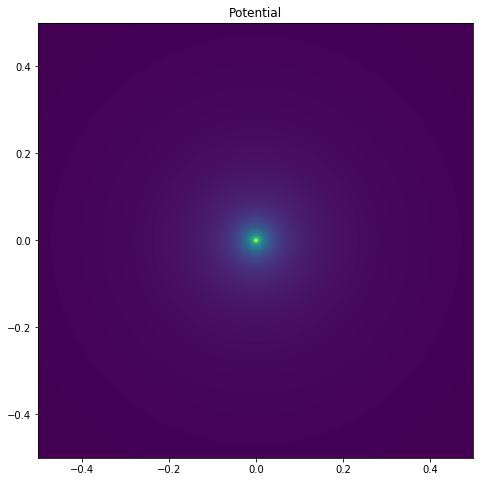

In [121]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Potential')
ax.pcolormesh(x,y,potential)
ax.set(aspect=1);

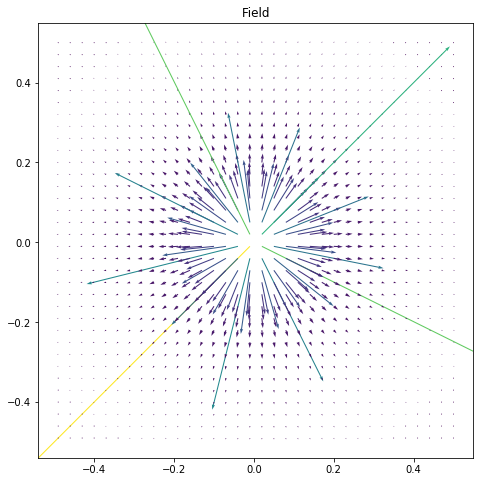

In [122]:
skip = (slice(None, None, 15), slice(None, None, 15))

fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Field')
ax.quiver(x[skip], y[skip], Ex[skip], Ey[skip], potential[skip])
ax.set(aspect=1);

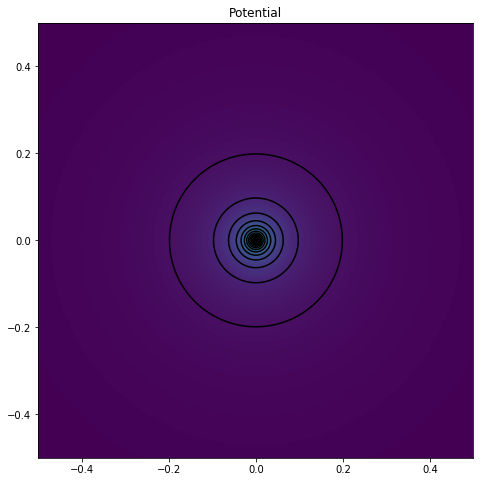

In [123]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Potential')
ax.pcolormesh(x,y,potential)
ax.contour(x, y, potential, 20, colors = 'k')
ax.set(aspect = 1);

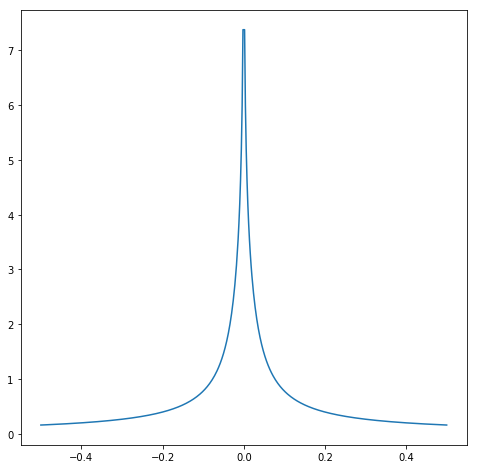

In [124]:
xc, yc = x.shape
xc //= 2
yc //= 2
fig, ax = plt.subplots(figsize = (8,8)) 
ax.plot(x[xc, :], potential[xc,:])

# Minimize Field over Region

First testing one V shaped array of rods

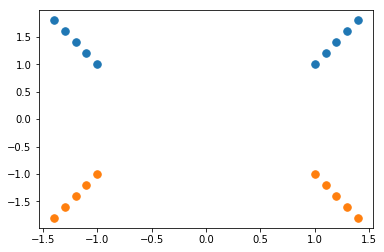

In [125]:
nwires = 5
x0wire = 1
y0wire = 1
dxwire = 0.1
dywire = 0.2
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [126]:
def wires_potential(x,y,wires):
    xwires = wires[0]
    ywires = wires[1]
    charge = wires[2]
    potential = np.zeros(x.shape)
    for xw,yw,cw in zip(xwires, ywires, charge):
        potential += Epotential(x, y, cw, xw, yw, 0.08)
        
    potential[potential == np.inf] = np.nan
    potential[np.isnan(potential)] = np.nanmax(potential)
    potential[potential == -np.inf] = np.nan
    potential[np.isnan(potential)] = np.nanmin(potential)
    
    return potential

In [128]:
dx = .025
dy = .025
y,x = np.mgrid[-2:2:501j,-2:2:501j]
w = wires.copy()
w[2] = wires[1].copy()
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy

C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


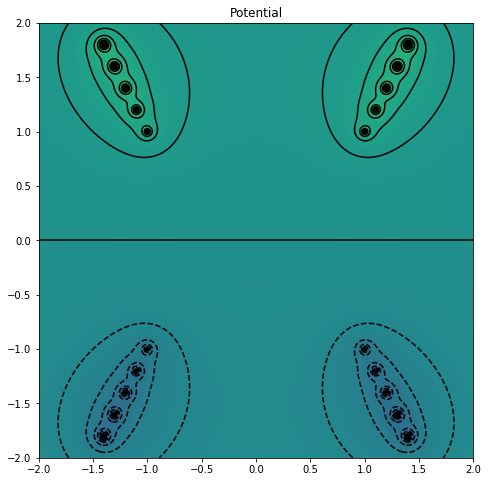

In [131]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Potential')
ax.pcolormesh(x,y,potential)
ax.contour(x, y, potential, 30, colors = 'k')
ax.set(aspect = 1);

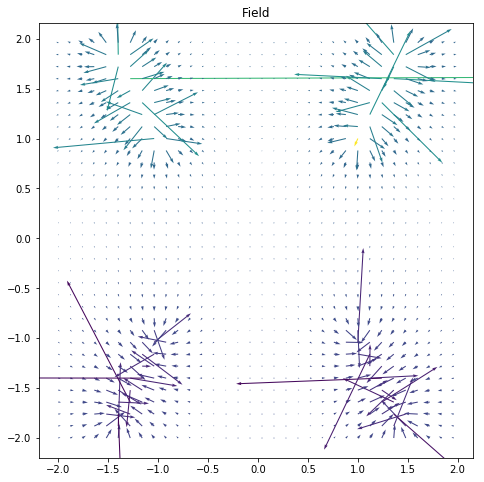

In [132]:
skip = (slice(None, None, 15), slice(None, None, 15))

fig, ax = plt.subplots(figsize = (8,8))
ax.set_title('Field')
ax.quiver(x[skip], y[skip], Ex[skip], Ey[skip], potential[skip])
ax.set(aspect=1);

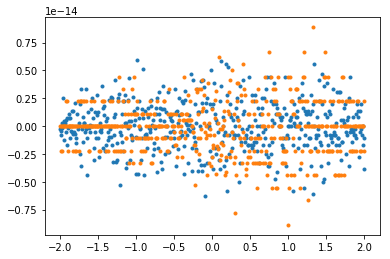

In [133]:
plt.plot(x[250,:], Ex[250,:], '.')
plt.plot(y[:,250], Ex[:,250], '.')

Minimization function minimizes the integral of $\frac{\left(E_y-E_y(0,0)\right)^2}{E_y(0,0)^2}$ over the surface the molecular beam interacts with.

In [134]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges)*4)*w[2,:]
    w[2,:] = c
    potential = wires_potential(x, y, w)
    Ey, Ex = np.gradient(-potential)
    EyX, EyY = Ey[xc,:], Ey[xc,:]
#     EyT, EyR = Ey[0,:], Ey[:,0]
#     ExT, ExR = Ex[0,:], Ex[:,0]
    return ((EyX-Ey[xc,yc])**2).sum()/Ey[xc,yc]**2
#     return (EyX**2+EyY**2+EyT**2+EyR**2).sum()/(Ey[xc,yc])**2

In [135]:
y,x = np.mgrid[0.5:-0.5:101j,0.5:-0.5:101j]

In [136]:
from scipy.optimize import minimize
bounds = [(0,10)]*5
x0 = [1]*5
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))

In [137]:
m

      fun: 0.07483894735947191
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.28297774e-01,  1.38693172e-01,  5.61123800e-02,  1.80639267e-02,
       -6.46843690e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 96
      nit: 5
   status: 0
  success: True
        x: array([0.        , 0.        , 0.        , 0.        , 3.59289305])

It turns out that for a V shaped array of rods the most homogeneous field is generated by setting all rods to zero voltage except the furthest rod

In [138]:
w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)
xc, yc = E.shape
xc //= 2
yc //= 2

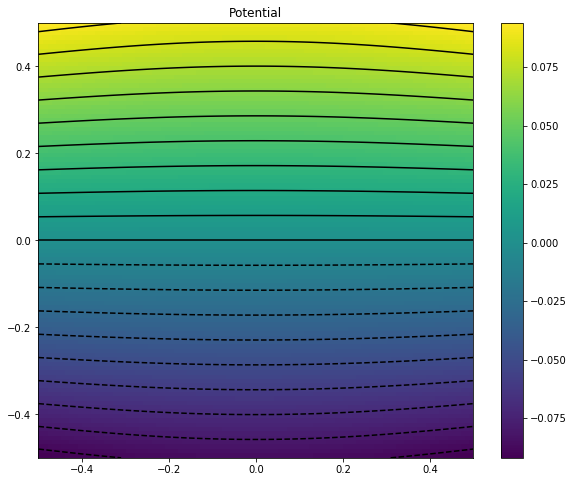

In [139]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Potential')
pc = ax.pcolormesh(x,y,potential)
ax.contour(x, y, potential, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

maximum field inhomogeneity : 11.86 %


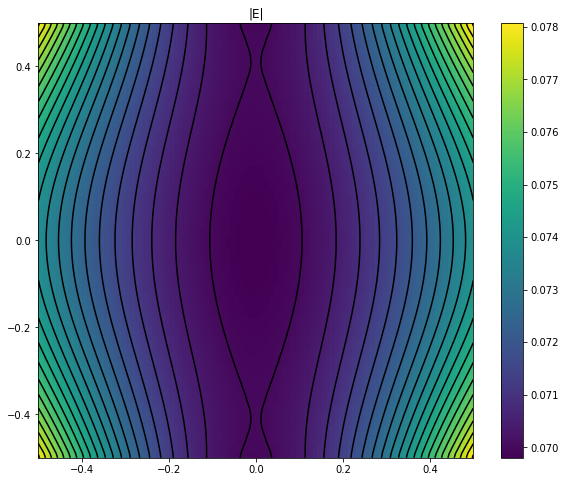

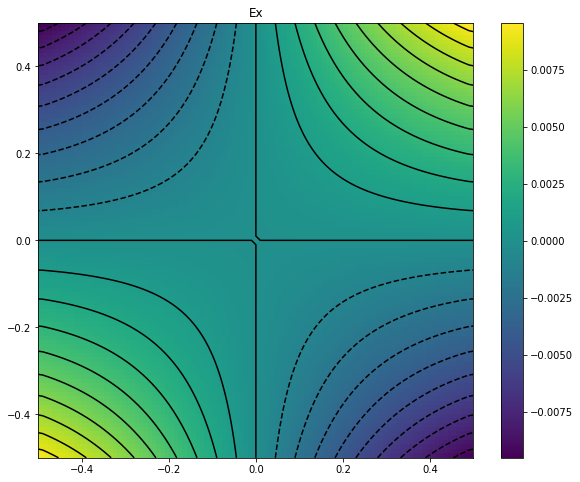

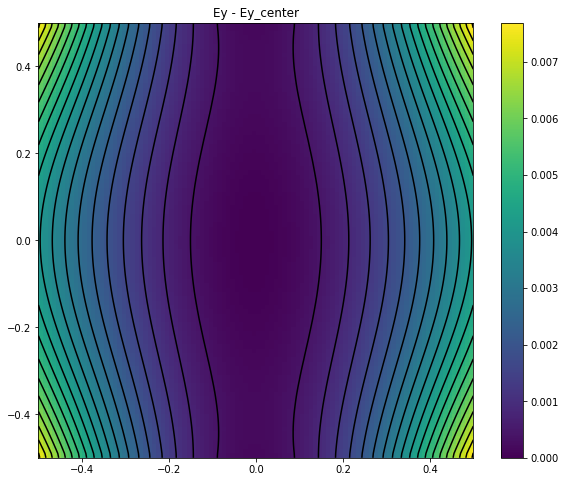

In [140]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

The other V shaped rod array

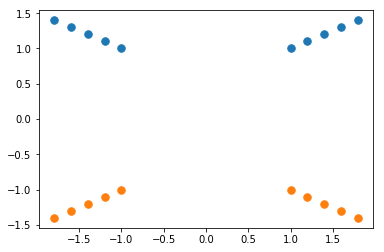

In [141]:
nwires = 5
x0wire = 1
y0wire = 1
dxwire = 0.2
dywire = 0.1
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
  
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [142]:
from scipy.optimize import minimize
bounds = [(0,10)]*5
x0 = [1]*5
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))
m

      fun: 0.49578353392948077
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.16025958e-01, 3.39247586e-01, 1.61541985e-01, 5.80455795e-02,
       2.35478304e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 150
      nit: 7
   status: 0
  success: True
        x: array([0.       , 0.       , 0.       , 0.       , 3.3871133])

Also sets all voltages to zero except the furthest ones

In [143]:
w = wires.copy()
w[2,:] = w[2,:]*np.array(list(m.x)*4)
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy

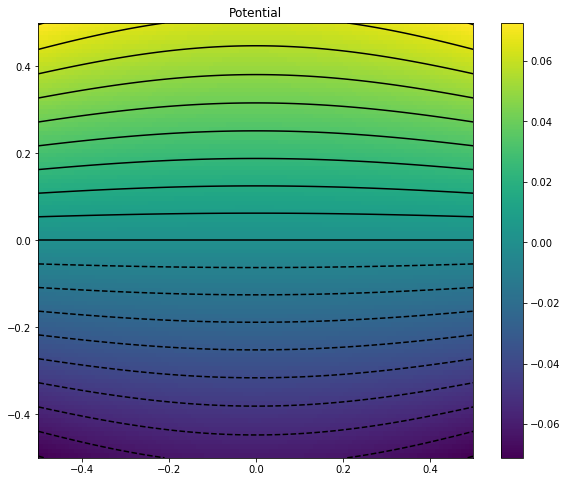

In [144]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Potential')
pc = ax.pcolormesh(x,y,potential)
ax.contour(x, y, potential, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

maximum field inhomogeneity : 11.86 %


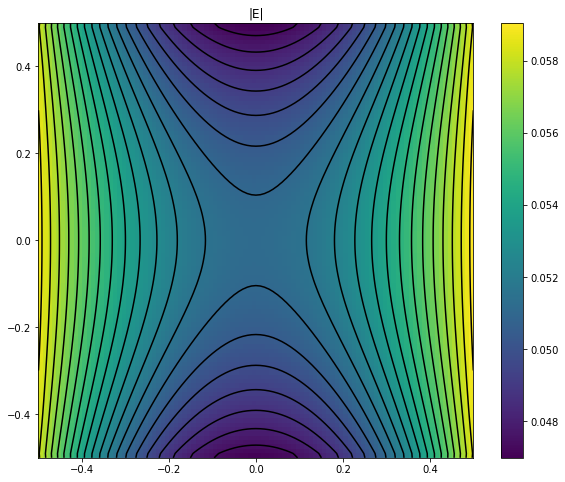

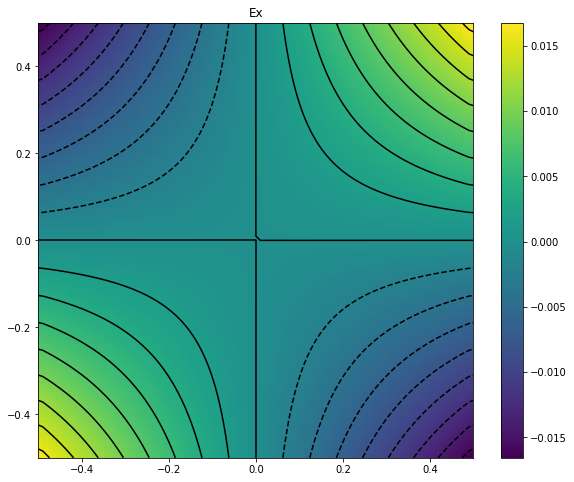

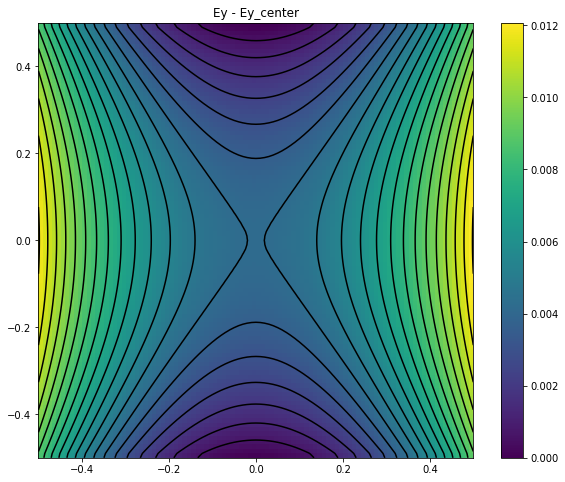

In [145]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Horizontal wires

Array of wires spanned horizontally over the molecular beam, beam comes out of screen. With the microwave polarization at a $45^\circ$ angle to the wires, half the power should get to the interaction region

### Wires at fixed positions; voltage varied

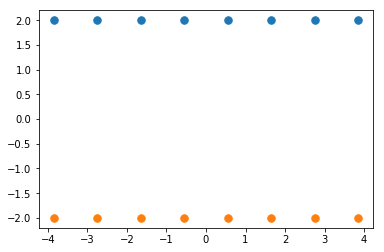

In [146]:
nwires = 4
x0wire = .55
y0wire = 2
dxwire = 1.1
dywire = 0
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+nwires] = x0wire + n*dxwire
    wires[1][n+nwires] = y0wire + n*dywire
    wires[2][n+nwires] = 1
    wires[0][n+nwires*2] = -x0wire - n*dxwire
    wires[1][n+nwires*2] = -y0wire - n*dywire
    wires[2][n+nwires*2] = -1
    wires[0][n+nwires*3] = x0wire + n*dxwire
    wires[1][n+nwires*3] = -y0wire - n*dywire
    wires[2][n+nwires*3] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [147]:
dx = .025
dy = .025
y,x = np.mgrid[-2.5:2.5:2001j,-5:5:2001j]
w = wires.copy()
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy

C:\Users\Olivier\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


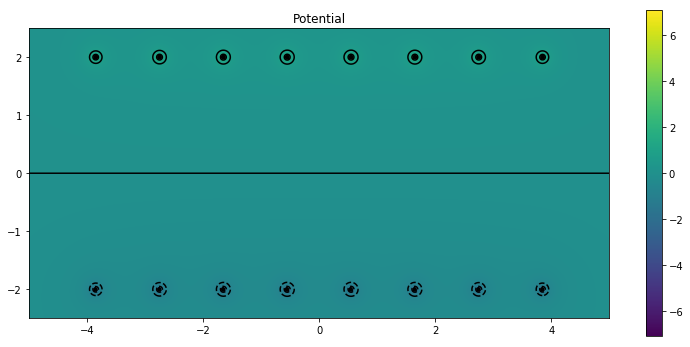

In [148]:
fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Potential')
pc = ax.pcolormesh(x,y,potential)
ax.contour(x, y, potential, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [149]:
dx = .025
dy = .025
y,x = np.mgrid[-.6:.6:501j,-1.2:1.2:1001j]
w = wires.copy()
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

maximum field inhomogeneity : 12.69 %


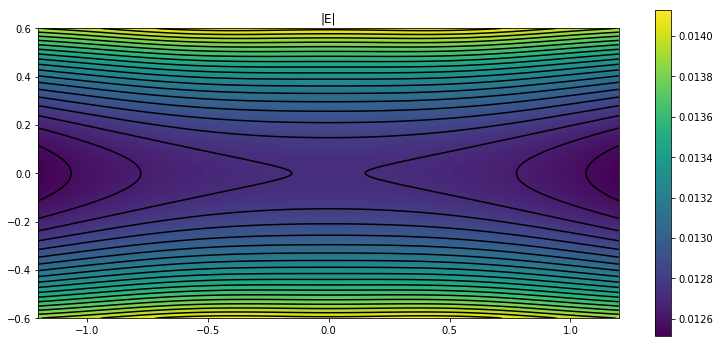

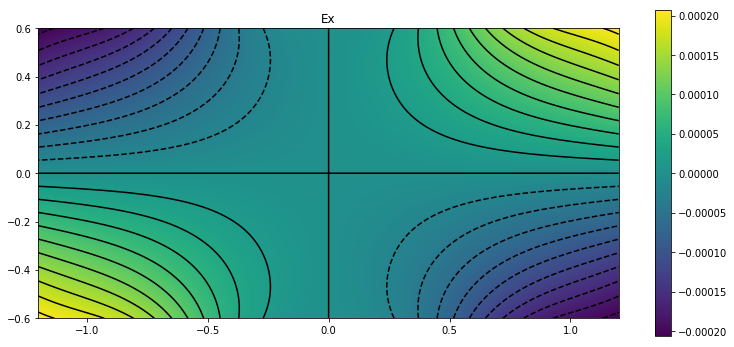

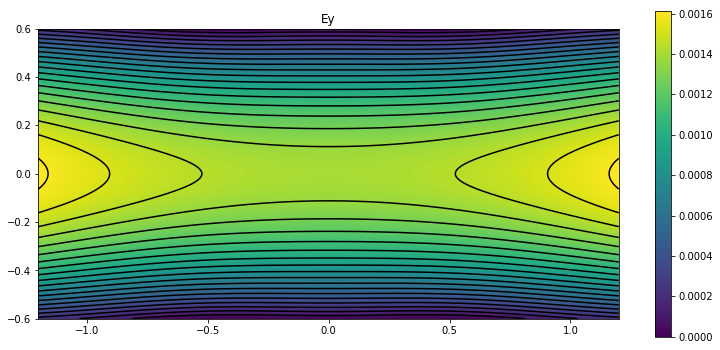

In [150]:
xc, yc = E.shape
xc //= 2
yc //= 2
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [162]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges)*4)*w[2,:]
    w[2,:] = c
    potential = wires_potential(x, y, w)
    Ey, Ex = np.gradient(-potential)
    E = np.sqrt(Ex**2+Ey**2)
#     EyX, EyY = Ey[xc,:], Ey[xc,:]
#     EyT, EyR = Ey[0,:], Ey[:,0]
#     ExT, ExR = Ex[0,:], Ex[:,0]
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2
#     return ((EyX-Ey[xc,yc])**2).sum()/Ey[xc,yc]**2
#     return (EyX**2+EyY**2+EyT**2+EyR**2).sum()/(Ey[xc,yc])**2

In [163]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

Method 'SLSQP' gives the best result when setting the voltages/charges to 1 decimal point.  
Default method is 'L-BFGS-B', which gives a much better result without a decimal point limit.

In [164]:
from scipy.optimize import minimize
bounds = [(0,10)]*nwires
x0 = [1]*nwires
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires), method = 'SLSQP')
m

     fun: 21.74175202994049
     jac: array([ 1.02918148e-02,  9.43035817e+00,  2.04287910e+00, -2.51436234e-03])
 message: 'Optimization terminated successfully.'
    nfev: 58
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.32809436e+00, 2.63047374e-12, 4.53355244e-11, 1.00000000e+01])

In [165]:
w = wires.copy()
w[2] = np.array(list(m.x)*4)*w[2,:]
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

maximum field inhomogeneity : 10.25 %


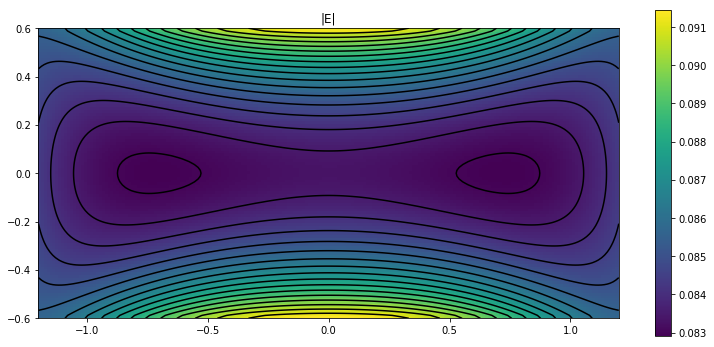

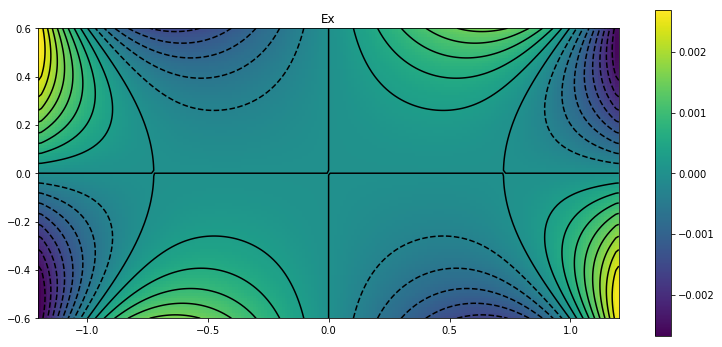

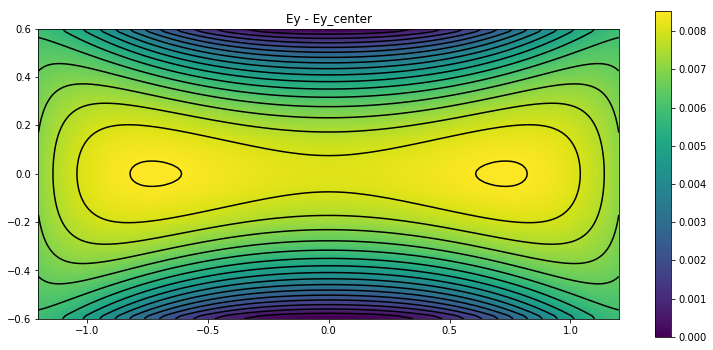

In [166]:
xc, yc = E.shape
xc //= 2
yc //= 2
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [172]:
x0 = m.x.round(1)
print(x0)
print(np.unique(x0).size)

w = wires.copy()
w[2] = np.array(list(x0)*4)*w[2,:]
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

[ 1.3  0.   0.  10. ]
3


maximum field inhomogeneity : 9.98 %


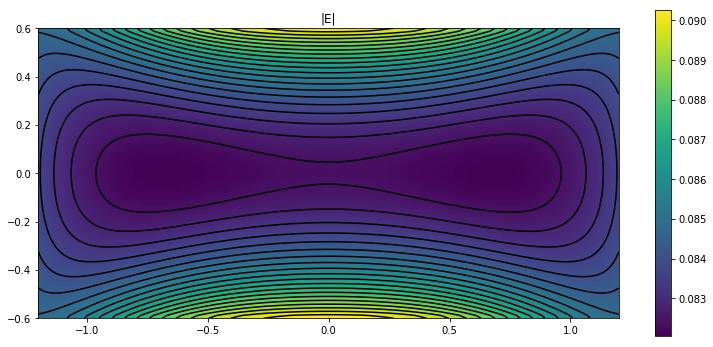

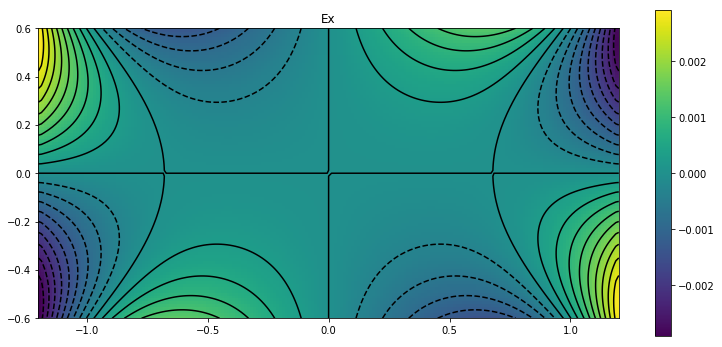

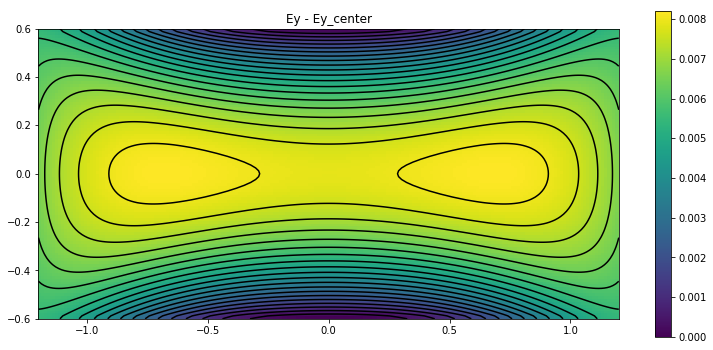

In [173]:
xc, yc = E.shape
xc //= 2
yc //= 2
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

randomly adding +/- 0.1 to the charges found in the optimization sequence to find the minimum.  

In [168]:
mmin = minimize_function(x0, x, y, wires)
print('iter #{0:>6} : mmin = {1:.2e}'.format(0, mmin))
cmin = np.zeros(len(x0))
iters = 0
np.random.seed(1)
while True:
    try:
        iters += 1
        c = x0.copy()
        c += np.abs(np.random.randint(-3,3,nwires)/10)
        mm = minimize_function(c, x, y, wires)
        if mm < mmin:
            print('iter #{0:>6} : mmin = {1:.2e}'.format(iters, mm))
            mmin = mm
            cmin = c
    except KeyboardInterrupt:
        print()
        print('Stop random minimum finder after {0} iterations'.format(iters))
        print('start mmin : {0:.2e}; stop mmin {1:.2e}'.format(minimize_function(x0, x, y, wires), mmin))
        print()
        print(cmin)
        break

iter #     0 : mmin = 4.29e+01
iter #     1 : mmin = 4.03e+01
iter #     2 : mmin = 4.01e+01
iter #   824 : mmin = 4.01e+01

Stop random minimum finder after 936 iterations
start mmin : 4.29e+01; stop mmin 4.01e+01

[1.3 1.  1.3 1.2]


In [169]:
print(len(np.unique(cmin)))

3


In [170]:
w = wires.copy()
w[2] = np.array(list(cmin)*4)*w[2,:]
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

maximum field inhomogeneity : 15.02 %


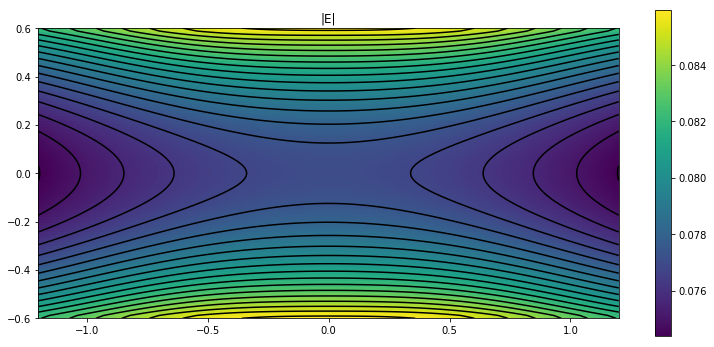

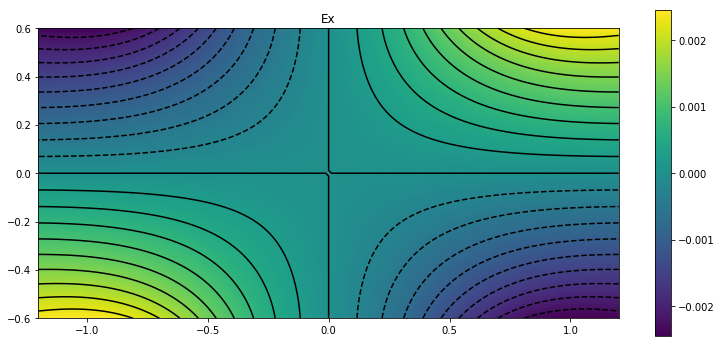

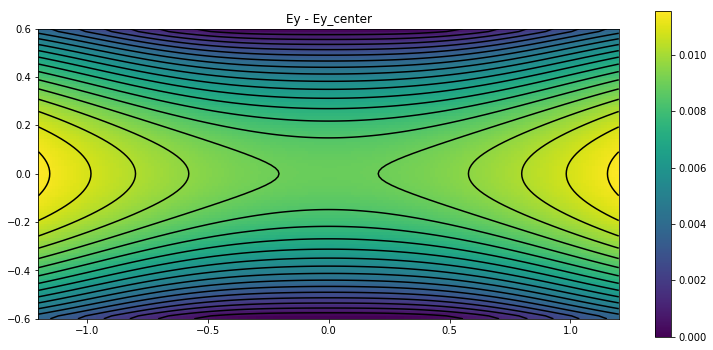

In [171]:
xc, yc = E.shape
xc //= 2
yc //= 2
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [172]:
dx = .025
dy = .025
y,x = np.mgrid[-2.5:2.5:501j,-4:4:501j]

w = wires.copy()
w[2] = np.array(list(m.x)*4)*w[2,:]
potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy

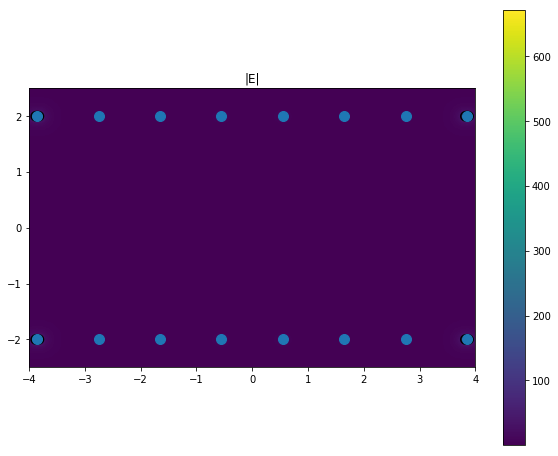

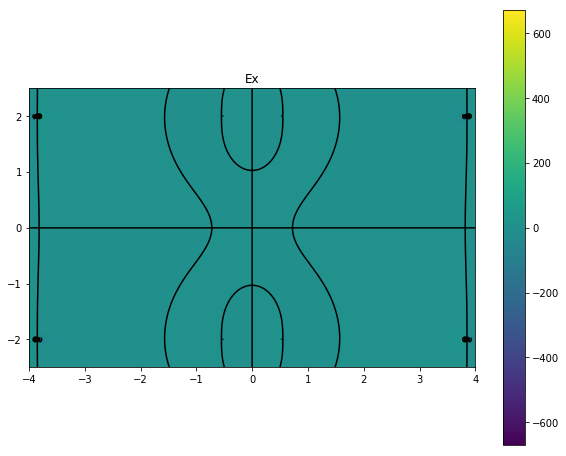

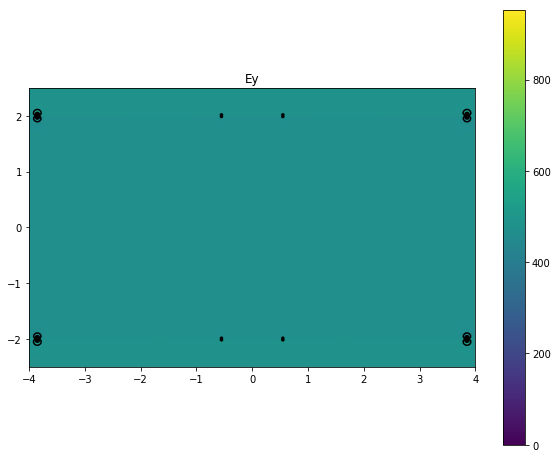

In [173]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, np.sqrt(Ex**2+Ey**2))
ax.contour(x, y, np.sqrt(Ex**2+Ey**2), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(wires[0,:], wires[1,:], '.', ms = 20)

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Both V shaped rod arrays

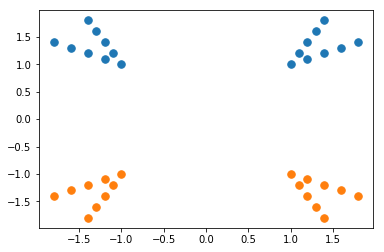

In [174]:
nwires = 5
x0wire = 1
x0wire2 = 1
y0wire = 1
y0wire2 = 1
dxwire = 0.1
dywire = 0.2
dxwire2 = 0.2
dywire2 = 0.1
wires = np.zeros((3,4*nwires+4*(nwires-1)))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+5] = x0wire + n*dxwire
    wires[1][n+5] = y0wire + n*dywire
    wires[2][n+5] = 1
    wires[0][n+10] = -x0wire - n*dxwire
    wires[1][n+10] = -y0wire - n*dywire
    wires[2][n+10] = -1
    wires[0][n+15] = x0wire + n*dxwire
    wires[1][n+15] = -y0wire - n*dywire
    wires[2][n+15] = -1
    if n > 0:
        wires[0][n+19] = -x0wire2 - n*dxwire2
        wires[1][n+19] = y0wire2 + n*dywire2
        wires[2][n+19] = 1
        wires[0][n+23] = x0wire2 + n*dxwire2
        wires[1][n+23] = y0wire2 + n*dywire2
        wires[2][n+23] = 1
        wires[0][n+27] = - x0wire2 - n*dxwire2
        wires[1][n+27] = - y0wire2 - n*dywire2
        wires[2][n+27] = -1
        wires[0][n+31] = x0wire2 + n*dxwire2
        wires[1][n+31] = -y0wire2 - n*dywire2
        wires[2][n+31] = -1

plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [175]:
def minimize_function(charges, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    c = np.array(list(charges[:5])*4)*w[2,:20]
    w[2,:20] = c
    c = np.array(list(charges[5:])*4)*w[2,20:]
    w[2,20:] = c
    potential = wires_potential(x, y, w)
    Ey, Ex = np.gradient(-potential)
    EyX, EyY = Ey[xc,:], Ey[xc,:]
#     EyT, EyR = Ey[0,:], Ey[:,0]
#     ExT, ExR = Ex[0,:], Ex[:,0]
    return ((Ey-Ey[xc,yc])**2).sum()/Ey[xc,yc]**2
    return ((EyX-Ey[xc,yc])**2).sum()/Ey[xc,yc]**2
#     return (EyX**2+EyY**2+EyT**2+EyR**2).sum()/(Ey[xc,yc])**2

In [176]:
dx = .025
dy = .025
y,x = np.mgrid[-.5:.5:501j,-.5:.5:501j]

In [177]:
from scipy.optimize import minimize
bounds = [(0,100)]*9
x0 = [1, 1.2, 1.4, 1.6, 1.8, 1.1, 1.2, 1.3, 1.4]
m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires))
m

      fun: 329.0808968093633
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([41.95156862, 18.09404466,  7.43681312,  2.37444624, -0.04534968,
       18.12531991,  8.20406854,  3.63256731,  1.38277869])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 200
      nit: 5
   status: 0
  success: True
        x: array([  0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.])

Again all voltages except the voltages for the furthest rods are set to zero

In [175]:
x0
w = wires.copy()
c = np.array(list(m.x[:5])*4)*w[2,:20]
w[2,:20] = c
c = np.array(list(m.x[5:])*4)*w[2,20:]
w[2,20:] = c

potential = wires_potential(x,y,w)
Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

xc, yc = E.shape
xc //= 2
yc //= 2

ValueError: operands could not be broadcast together with shapes (16,) (20,) 

maximum field inhomogeneity : 15.02 %


TypeError: Dimensions of C (101, 201) are incompatible with X (501) and/or Y (501); see help(pcolormesh)

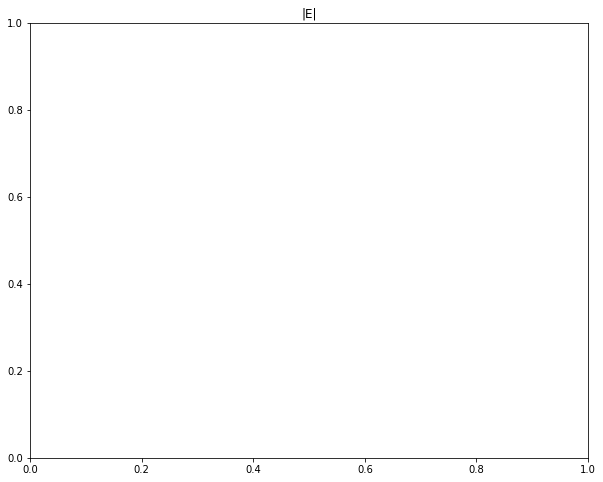

In [176]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

# Changing wire positions; all same voltage

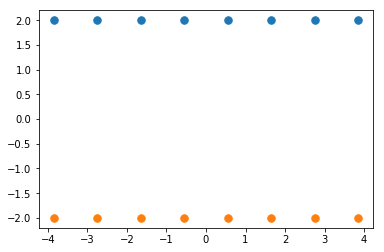

In [216]:
nwires = 4
x0wire = .55
y0wire = 2
dxwire = 1.1
dywire = 0
wires = np.zeros((3,4*nwires))
for n in range(nwires):
    wires[0][n] = -x0wire - n*dxwire
    wires[1][n] = y0wire + n*dywire
    wires[2][n] = 1
    wires[0][n+nwires] = x0wire + n*dxwire
    wires[1][n+nwires] = y0wire + n*dywire
    wires[2][n+nwires] = 1
    wires[0][n+nwires*2] = -x0wire - n*dxwire
    wires[1][n+nwires*2] = -y0wire - n*dywire
    wires[2][n+nwires*2] = -1
    wires[0][n+nwires*3] = x0wire + n*dxwire
    wires[1][n+nwires*3] = -y0wire - n*dywire
    wires[2][n+nwires*3] = -1
    
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == 1].T[1], '.', ms = 15)
plt.plot(wires.T[wires[2] == 1].T[0], wires.T[wires[2] == -1].T[1], '.', ms = 15);

In [217]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

potential = wires_potential(x,y,wires)

Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 12.49 %


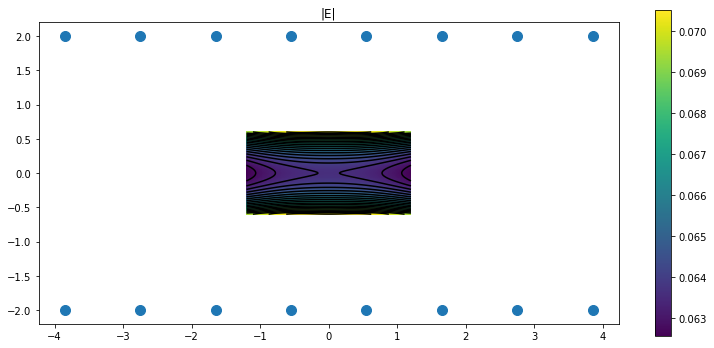

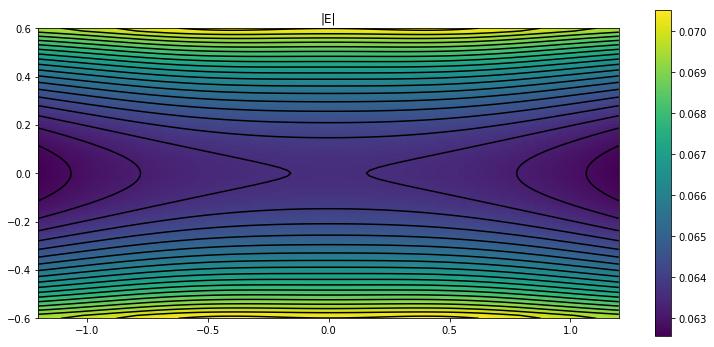

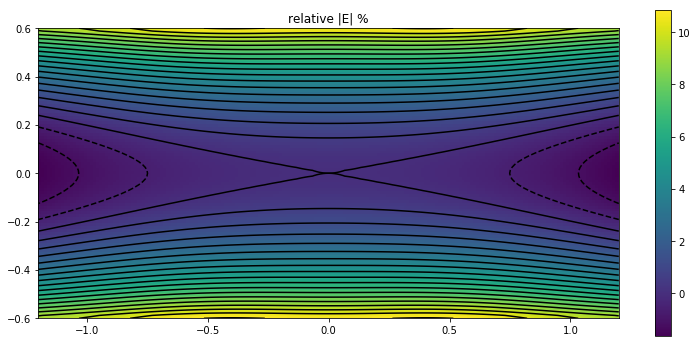

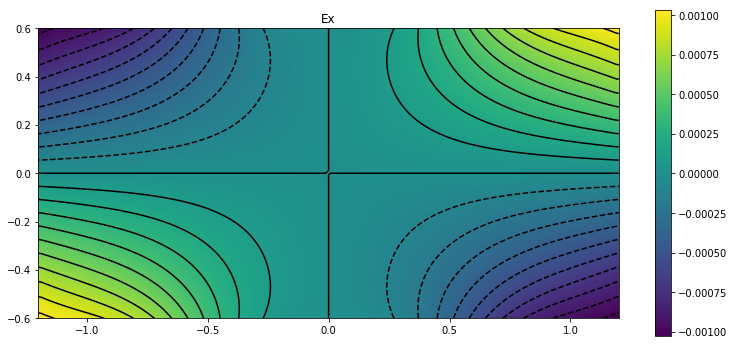

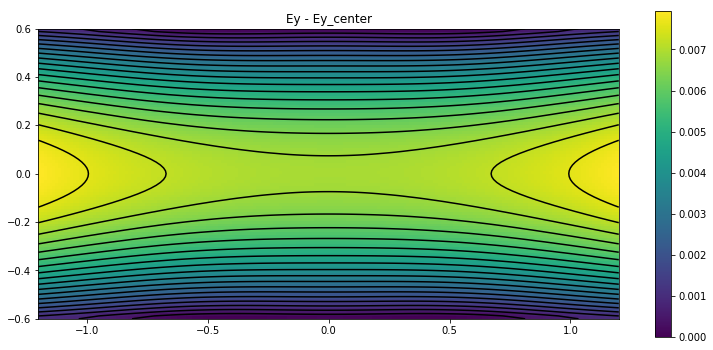

In [220]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);
ax.plot(wires[0,:], wires[1,:], '.', ms = 20)

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('relative |E| %')
pc = ax.pcolormesh(x, y,  100*(E-E[xc,yc])/E[xc,yc])
ax.contour(x, y, 100*(E-E[xc,yc])/E[xc,yc], 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [221]:
def minimize_function(wpos, x, y, wires):
    xc, yc = x.shape
    xc //= 2
    yc //= 2
    w = wires.copy()
    wpos = list(np.append(-wpos, wpos))*2
    w[0,:] = wpos
    potential = wires_potential(x, y, w)
    Ey, Ex = np.gradient(-potential)
    E = np.sqrt(Ex**2+Ey**2)
#     EyX, EyY = Ey[xc,:], Ey[xc,:]
#     EyT, EyR = Ey[0,:], Ey[:,0]
#     ExT, ExR = Ex[0,:], Ex[:,0]
    return ((E-E[xc,yc])**2).sum()/E[xc,yc]**2
#     return ((EyX-Ey[xc,yc])**2).sum()/Ey[xc,yc]**2
#     return (EyX**2+EyY**2+EyT**2+EyR**2).sum()/(Ey[xc,yc])**2

In [222]:
y,x = np.mgrid[-.6:.6:101j,-1.2:1.2:201j]

In [223]:
class MyBounds(object):
    def __init__(self, xmax=[1.1,1.1], xmin=[-1.1,-1.1] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin
    
def print_fun(x, f, accepted):
        print("at minimum %.10e accepted %d" % (f, int(accepted)))
        print(x)

In [224]:
%%timeit
np.random.seed(2)
while True:
    x0 = np.random.random(nwires)*4
    if np.sum(x0 > bounds[0][0]) == nwires:
        break
x0.sort()
minimize_function(x0, x, y, wires)

8.3 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [225]:
from scipy.optimize import minimize, basinhopping, brute
np.random.seed(2)
while True:
    x0 = np.random.random(nwires)*4
    if np.sum(x0 > bounds[0][0]) == nwires:
        break
x0.sort()
bounds = [(0.01,4)]*nwires
m1 = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires), method = 'L-BFGS-B')
m1

      fun: 29.12394487978753
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.03219718, -0.01255103, -0.00698357,  0.01635989])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 195
      nit: 18
   status: 0
  success: True
        x: array([0.40748442, 2.62107398, 2.62576354, 2.62480284])

In [226]:
# %%timeit
import time
from scipy.optimize import minimize, basinhopping, brute
np.random.seed(2)
while True:
    x0 = np.random.random(nwires)*4
    if np.sum(x0 > bounds[0][0]) == nwires:
        break
x0.sort()
# bounds = [(0.01,4)]*nwires
# m = minimize(minimize_function, x0 = x0, bounds = bounds, args = (x, y, wires), method = 'L-BFGS-B')
# mybounds = MyBounds(xmax = [4]*nwires, xmin = [0.05]*nwires)
# mini = lambda z: minimize_function(z, x, y, wires)
# m = basinhopping(mini, x0, accept_test = mybounds, callback=print_fun, niter = 10)
# r = tuple([slice(0.1,1.1,0.1)]*4)
r = (slice(0.1,1.5,0.1), slice(1,3,0.1), slice(2,4.1,0.1), slice(2,4.1,0.1))
tstart = time.time()
m = brute(minimize_function, args = (x, y, wires), ranges = r, disp = True, full_output=True, finish = None)
print('{0:.2f} s'.format(time.time()-tstart))
m[0]

1015.70 s


array([0.4, 2.6, 2.6, 2.6])

In [227]:
w = wires.copy()
# wpos = list(np.append(-m1.x, m1.x))*2
wpos = list(np.append(-m[0], m[0]))*2
w[0,:] = wpos

potential = wires_potential(x,y,w)

Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 14.18 %


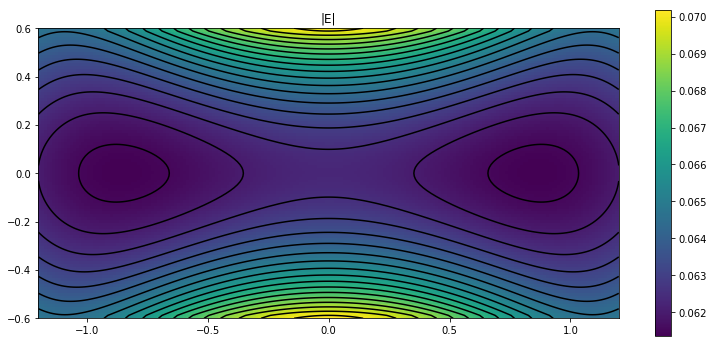

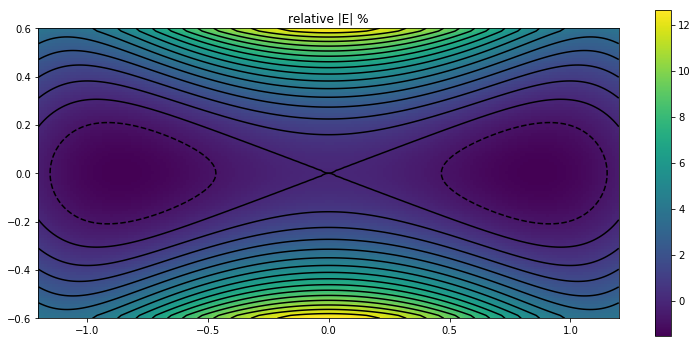

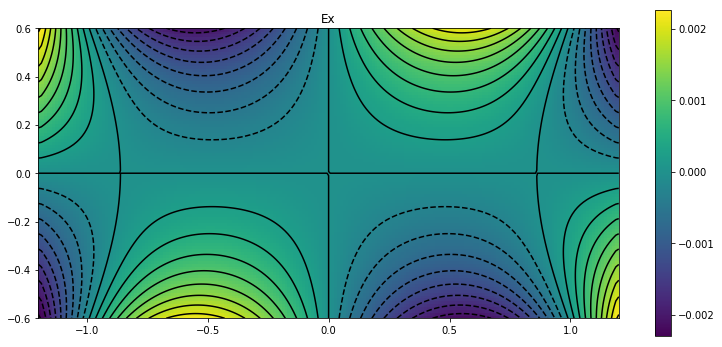

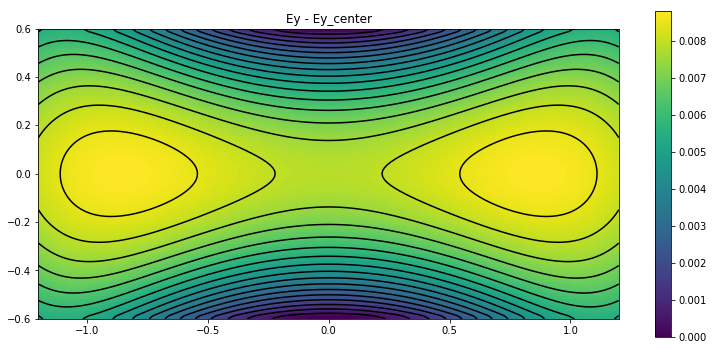

In [228]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('relative |E| %')
pc = ax.pcolormesh(x, y,  100*(E-E[xc,yc])/E[xc,yc])
ax.contour(x, y, 100*(E-E[xc,yc])/E[xc,yc], 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

In [229]:
w = wires.copy()
wpos = list(np.append(-m1.x.round(1), m1.x.round(1)))*2
w[0,:] = wpos

potential = wires_potential(x,y,w)

Ey, Ex = np.gradient(-potential)
Ex /= dx
Ey /= dy
E = np.sqrt(Ex**2+Ey**2)

xc, yc = E.shape
xc //= 2
yc //= 2

maximum field inhomogeneity : 14.18 %


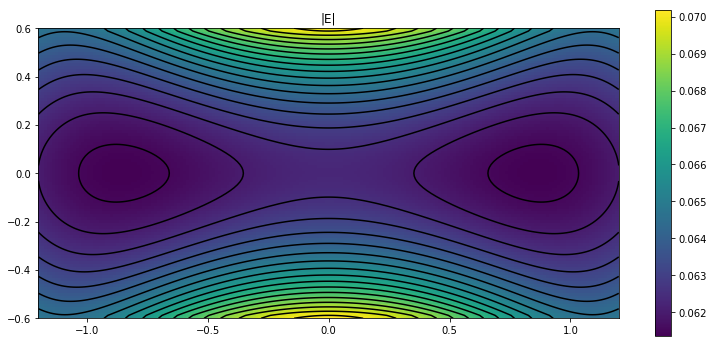

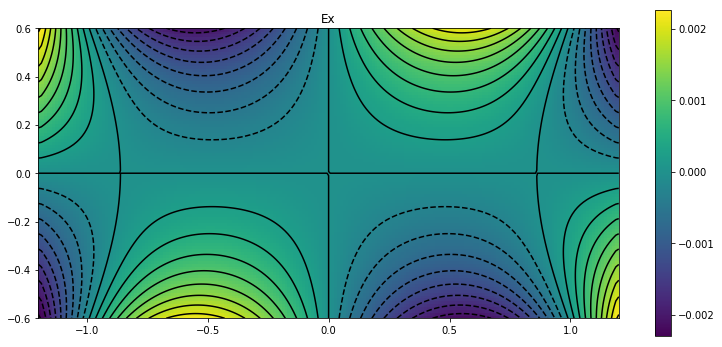

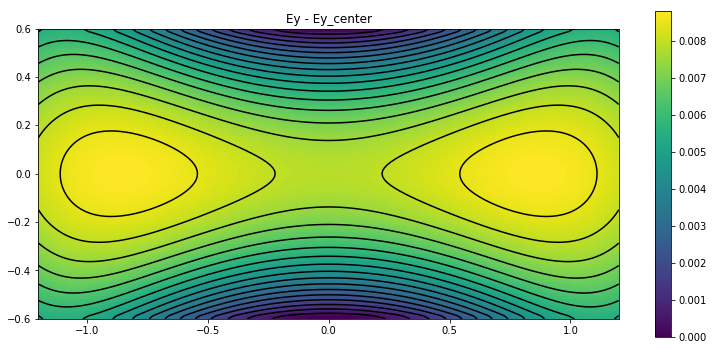

In [230]:
print('maximum field inhomogeneity : {0:.2f} %'.format(100*np.abs((E.ptp())/E[xc,yc])))

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('|E|')
pc = ax.pcolormesh(x, y, E)
ax.contour(x, y, E, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ex')
pc = ax.pcolormesh(x, y, Ex)
ax.contour(x, y, Ex, 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);

fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Ey - Ey_center')
pc = ax.pcolormesh(x, y, Ey-Ey.min())
ax.contour(x, y, Ey-Ey.min(), 20, colors = 'k')
ax.set(aspect = 1);
fig.colorbar(pc);